# Tutorial
This assumes you have run the relevant .ctl files in the Examples directory.

Author: Nishan Singh Mann

@Matthew-Mcnish: You need to figure out how to open this file in your web browser. Start by typing `ipython3 notebook` in your terminal.

In [1]:
from MPBParser import MPBBandStructure, readfield, getscale
from misc_plotting_utilities import fourier_transform
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from plotsmpb import plotbands, plotfields, plotvg
from math import sqrt
import sys

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# 1D PCs

### GaAs Bulk
Find in Examples/1D/GaAs_Bulk/

Run using ```mpb run.ctl > run.out```

We impose an artificial periodicity. Use this example to understand the concept of zone folding.

In [3]:
# Initialize an instance of class MPBBandStructure
mpb_1D_GaAsBulk = MPBBandStructure('Examples/1D/GaAs_Bulk/run.out', '')

In [4]:
# Parse the output data into csv files
mpb_1D_GaAsBulk.csvparser()
# At this point, you can use the .csv files to plot them in a program of your liking.

Examples/1D/GaAs_Bulk/freqs.csv and Examples/1D/GaAs_Bulk/velocities.csv already exist. SKIP CREATION.


In [5]:
# Read the bandstructure data from the two .csv files
mpb_1D_GaAsBulk.readbanddata()

Opening Examples/1D/GaAs_Bulk/freqs.csv
Opening Examples/1D/GaAs_Bulk/velocities.csv
No velocity data in velocities csv file. Velocity attributes NOT created.
Parsing of csv files complete. New data attributes created!


In [6]:
# At this point, you should use the TAB autocompletion feature of IPython to examine the new data attributes.
# For example, let's look at the number of k-points
mpb_1D_GaAsBulk.numK

22

In [7]:
# The frequencies are stored as a tuple (k index, band index)
np.shape(mpb_1D_GaAsBulk.freqs)

(22, 4)

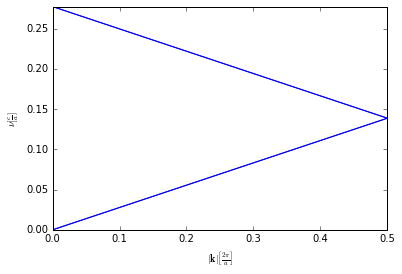

In [8]:
# Let us look at the bandstructure. At this point, take a pause and understand zone folding
plotbands(mpb_1D_GaAsBulk)

In [9]:
# In this case, there are 4 bands but for now, plotbands plots all bands using the same colour (blue)
mpb_1D_GaAsBulk.numBands

4

## GaAsAir
We now increase the dielectric contrast to see a photonic band gap (PBG) forming.

In [25]:
mpb_1D_GaAsAir = MPBBandStructure('Examples/1D/GaAs_Air/run.out', '')
mpb_1D_GaAsAir.csvparser()
mpb_1D_GaAsAir.readbanddata()

Creating Examples/1D/GaAs_Air/freqs.csv
Creating Examples/1D/GaAs_Air/velocities.csv
Opening Examples/1D/GaAs_Air/freqs.csv
Opening Examples/1D/GaAs_Air/velocities.csv
Parsing of csv files complete. New data attributes created!


Now we plot the bands. Notice the new keyword arguement to plotbands called bandlist. It's a list of band indices you want to plot. Take it out and see what happens.

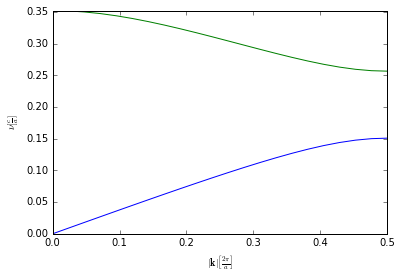

In [26]:
plotbands(mpb_1D_GaAsAir, bandlist=[0, 2])

We now plot the magnitude of the |k| vs |v_g|  instead. The syntax for plotvg is similiar to plotbands

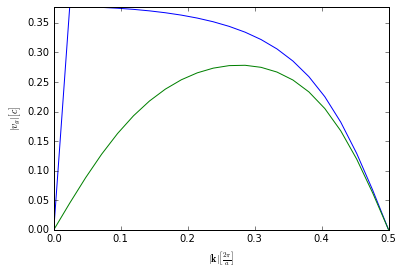

In [27]:
plotvg(mpb_1D_GaAsAir, bandlist=[0, 2])

We now plot the electric field distribuition using plotfields. Note for this, we need to specify two things; the k-index and band-index for the point we are interested in.

Complex fields created. Closing .h5 file and deleting attributes


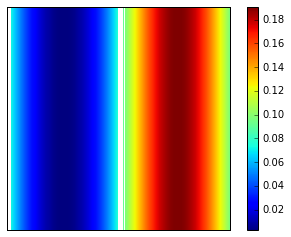

In [28]:
kind = 20
band = 0
plotfields(mpb_1D_GaAsAir, 'e', kind,  band)

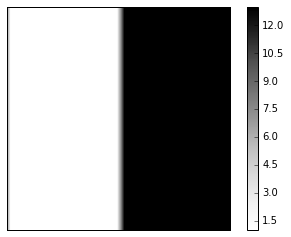

In [29]:
plotfields(mpb_1D_GaAsAir, 'epsilon')

plotfields is a complex command. Let us introduce some of it's basic arguements. We will introduce more as we go along
- 'e' : Plots |E|^2 along with contours of the dielectric. 
- 'epsilon' : plots the dielectric function
- kind, band are the indices for the band point to be plotted  

# 2D PCs

## 2D PC with air holes. Triangular Lattice.

In [30]:
mpb_2D_tri_air_holes = MPBBandStructure('Examples/2D/triangular_air_holes/run.out', 'te')
mpb_2D_tri_air_holes.csvparser()
mpb_2D_tri_air_holes.readbanddata()

Creating Examples/2D/triangular_air_holes/tefreqs.csv
Creating Examples/2D/triangular_air_holes/tevelocities.csv
Opening Examples/2D/triangular_air_holes/tefreqs.csv
Opening Examples/2D/triangular_air_holes/tevelocities.csv
Parsing of csv files complete. New data attributes created!


Nonsensical to use |k| for plotting.


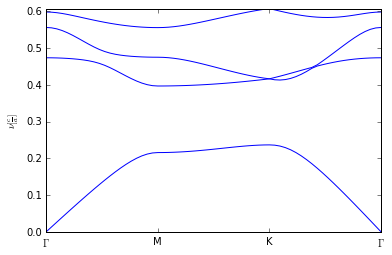

In [34]:
plotbands(mpb_2D_tri_air_holes, xticks=(0, 21, 42, 63),  xticklabels=[r'$\Gamma$', 'M', 'K', r'$\Gamma$'])

Convince yourself why it is nonsensical to use |k| as the x axis. In this case, MPBParser simply defualts to plotting frequency vs the k-index leaving it up to you to specifiy the x-labels. So to come up with this figure, you would need to look in the run.out file to know the k-indices so you can specify the xticks.

Let us look at the magnitude of the group velocity for each of these bands 

In [47]:
#plotvg(mpb_2D_tri_air_holes, bandlist=[0, 1])
#plt.xlim(0,0.1)

We now plot the dielectric function and the fields

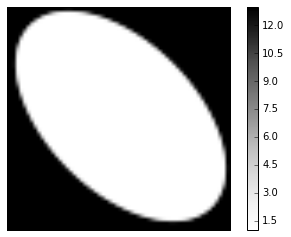

In [51]:
plotfields(mpb_2D_tri_air_holes, 'epsilon')

Complex fields created. Closing .h5 file and deleting attributes


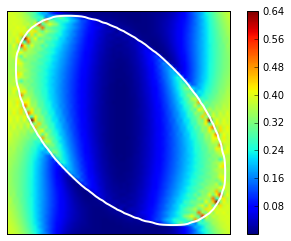

In [55]:
kind = 21  # M point
band = 0
plotfields(mpb_2D_tri_air_holes, 'e', kind, band, epsilon_contour_options={'levels': [7], 'linewidths': 2})

**Make sense what you see! Why are the epsilon contours and the fields skewed?**

** Use mpb_data to create a rectangular grid. Once that is done rerun the following commands. As of now, the following two cells WILL NOT RUN! ** 
This will give you a sense of what mpbpostprocess does.

In [ ]:
plotfields(mpb_2D_tri_air_holes, 'epsilon', mpbpostprocess=True)

In [ ]:
kind = 21  # M point
band = 0
plotfields(mpb, 'e', kind, band, mpbpostprocess=True, epsilon_contour_options={'levels': [7], 'linewidths': 1})